In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [44]:
df = pd.read_excel('C:\\Users\\Dell\\Makineogrenimi\\cardataset\\cardataset.xlsx')


In [45]:
df.head(5)

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [46]:
df.shape

(46405, 9)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [48]:
df.describe()

,mileage,price,hp,year
count,4.640500e+04,4.640500e+04,46376.000000,46405.000000
mean,7.117786e+04,1.657234e+04,132.990987,2016.012951
std,6.262531e+04,1.930470e+04,75.449284,3.155214
min,0.000000e+00,1.100000e+03,1.000000,2011.000000
25%,1.980000e+04,7.490000e+03,86.000000,2013.000000
50%,6.000000e+04,1.099900e+04,116.000000,2016.000000
75%,1.050000e+05,1.949000e+04,150.000000,2019.000000
max,1.111111e+06,1.199900e+06,850.000000,2021.000000


In [49]:
df.isnull().sum()

mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64

In [50]:
df.duplicated().sum()

2140

In [51]:
df.drop_duplicates(inplace=True)

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
df = pd.read_excel('C:\\Users\\Dell\\Makineogrenimi\\cardataset\\cardataset.xlsx')
print(df.info())
print(df.describe())

feature = df[['hp', 'year', 'mileage']]  # Özellikler
target = df['price']  # Hedef değişken

feature = feature.fillna(feature.mean())

feature_train, feature_test, target_train, target_test = train_test_split(
    feature, target, test_size=0.2, random_state=42
)

scaler = StandardScaler()
feature_train = scaler.fit_transform(feature_train)
feature_test = scaler.transform(feature_test)

model = KNeighborsRegressor(n_neighbors=5)
model.fit(feature_train, target_train)

predictions = model.predict(feature_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(target_test, predictions)
r2 = r2_score(target_test, predictions)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB
None
            mileage         price            hp          year
count  4.640500e+04  4.640500e+04  46376.000000  46405.000000
mean   7.117786e+04  1.657234e+04    132.990987   2016.012951
std    6.262531e+04  1.930470e+04     75.449284      3.155214
min    0.000000e+00  1.100000e+03      1.000000   2011.000000
25%    1.980000e+04  7.490000e+03     86.000000   2013.000000
50%    6.0000

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, cohen_kappa_score, precision_score, recall_score, f1_score


df = pd.read_excel('C:\\Users\\Dell\\Makineogrenimi\\cardataset\\cardataset.xlsx')


num_cols = ['price', 'hp', 'year', 'mileage',]
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Sayısal olmayanları NaN yap


df[num_cols] = df[num_cols].fillna(df[num_cols].mean())


df['price_group'] = pd.cut(
    df['price'], bins=[0, 50000, 100000, float('inf')],
    labels=['Dusuk', 'Orta', 'Yuksek']
)


df = df[df['price_group'].notnull()]


features = df[['hp', 'year', 'mileage',]]
target = df['price_group']


feature_train, feature_test, target_train, target_test = train_test_split(
    features, target, test_size=0.3, random_state=42
)


scaler = StandardScaler()
feature_train = scaler.fit_transform(feature_train)
feature_test = scaler.transform(feature_test)


model = KNeighborsClassifier(n_neighbors=5)
model.fit(feature_train, target_train)


predictions = model.predict(feature_test)


accuracy = accuracy_score(target_test, predictions)
precision = precision_score(target_test, predictions, average='weighted')
recall = recall_score(target_test, predictions, average='weighted')
f1 = f1_score(target_test, predictions, average='weighted')
kappa = cohen_kappa_score(target_test, predictions)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa:", kappa)
print("\nClassification Report:\n", classification_report(target_test, predictions))


Accuracy: 0.9801034334147393
Precision: 0.9783033979906958
Recall: 0.9801034334147393
F1 Score: 0.9789912701209759
Cohen's Kappa: 0.6511973670262512

Classification Report:
               precision    recall  f1-score   support

       Dusuk       0.99      0.99      0.99     13474
        Orta       0.65      0.53      0.58       360
      Yuksek       0.82      0.66      0.73        88

    accuracy                           0.98     13922
   macro avg       0.82      0.73      0.77     13922
weighted avg       0.98      0.98      0.98     13922



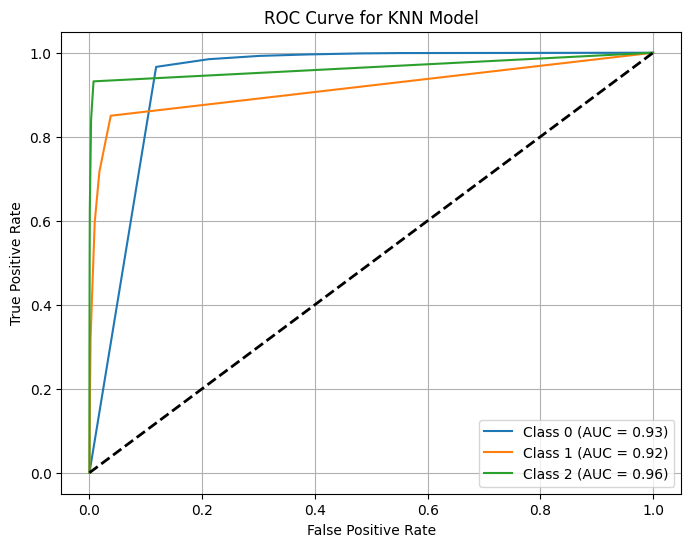

In [91]:

model = KNeighborsClassifier(n_neighbors=6)
model.fit(feature_train, target_train)


predictions_proba = model.predict_proba(feature_test)  # ROC için gerekli


from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

target_binarized = label_binarize(target_test, classes=['Dusuk', 'Orta', 'Yuksek'])
n_classes = target_binarized.shape[1]

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(target_binarized[:, i], predictions_proba[:, i])
    roc_auc[i] = roc_auc_score(target_binarized[:, i], predictions_proba[:, i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Rastgele tahmin çizgisi
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for KNN Model")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, cohen_kappa_score

df = pd.read_excel('C:\\Users\\Dell\\Makineogrenimi\\cardataset\\cardataset.xlsx')

num_cols = ['price', 'hp', 'year', 'mileage']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

df['price_group'] = pd.cut(
    df['price'], bins=[0, 50000, 100000, float('inf')],
    labels=['Dusuk', 'Orta', 'Yuksek']
)

df = df[df['price_group'].notnull()]

features = df[['hp', 'year', 'mileage']]
target = df['price_group']

feature_train, feature_test, target_train, target_test = train_test_split(
    features, target, test_size=0.3, random_state=42
)

scaler = StandardScaler()
feature_train = scaler.fit_transform(feature_train)
feature_test = scaler.transform(feature_test)

model = SVC(kernel='linear', C=1)
model.fit(feature_train, target_train)

predictions = model.predict(feature_test)

accuracy = accuracy_score(target_test, predictions)
precision = precision_score(target_test, predictions, average='weighted')
recall = recall_score(target_test, predictions, average='weighted')
f1 = f1_score(target_test, predictions, average='weighted')
kappa = cohen_kappa_score(target_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa:", kappa)
print("\nClassification Report:\n", classification_report(target_test, predictions))


Accuracy: 0.9811090360580377
Precision: 0.9783526235989094
Recall: 0.9811090360580377
F1 Score: 0.9789023115553996
Cohen's Kappa: 0.639713548790342

Classification Report:
               precision    recall  f1-score   support

       Dusuk       0.99      1.00      0.99     13474
        Orta       0.71      0.46      0.56       360
      Yuksek       0.83      0.61      0.71        88

    accuracy                           0.98     13922
   macro avg       0.84      0.69      0.75     13922
weighted avg       0.98      0.98      0.98     13922



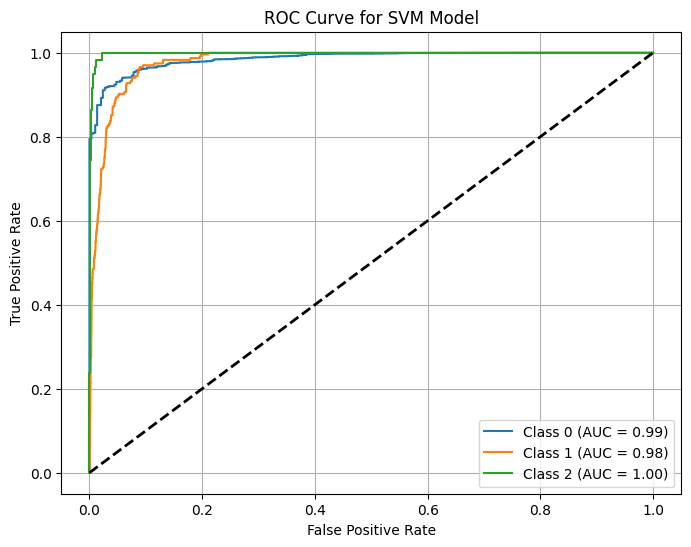

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

df = pd.read_excel('C:\\Users\\Dell\\Makineogrenimi\\cardataset\\cardataset.xlsx')

num_cols = ['price', 'hp', 'year', 'mileage']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

df['price_group'] = pd.cut(
    df['price'], bins=[0, 50000, 100000, float('inf')],
    labels=['Dusuk', 'Orta', 'Yuksek']
)

df = df[df['price_group'].notnull()]

# Özellikler ve hedef değişken
features = df[['hp', 'year', 'mileage',]]
target = df['price_group']

feature_train, feature_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

scaler = StandardScaler()
feature_train = scaler.fit_transform(feature_train)
feature_test = scaler.transform(feature_test)

model = SVC(kernel='linear', C=1, probability=True)
model.fit(feature_train, target_train)

predictions_proba = model.predict_proba(feature_test)  # ROC için gerekli

fpr = {}
tpr = {}
roc_auc = {}

target_binarized = label_binarize(target_test, classes=['Dusuk', 'Orta', 'Yuksek'])
n_classes = target_binarized.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(target_binarized[:, i], predictions_proba[:, i])
    roc_auc[i] = roc_auc_score(target_binarized[:, i], predictions_proba[:, i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Rastgele tahmin çizgisi
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVM Model")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, cohen_kappa_score

df = pd.read_excel('C:\\Users\\Dell\\Makineogrenimi\\cardataset\\cardataset.xlsx')

num_cols = ['price', 'hp', 'year', 'mileage', 'make' ,]
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

df['price_group'] = pd.cut(
    df['price'], bins=[0, 50000, 100000, float('inf')],
    labels=['Dusuk', 'Orta', 'Yuksek']
)

df = df[df['price_group'].notnull()]

features = df[['hp', 'year', 'mileage',]]
target = df['price_group']

feature_train, feature_test, target_train, target_test = train_test_split(
    features, target, test_size=0.3, random_state=42
)

scaler = StandardScaler()
feature_train = scaler.fit_transform(feature_train)
feature_test = scaler.transform(feature_test)

model = DecisionTreeClassifier(random_state=42)
model.fit(feature_train, target_train)


predictions = model.predict(feature_test)

accuracy = accuracy_score(target_test, predictions)
precision = precision_score(target_test, predictions, average='weighted')
recall = recall_score(target_test, predictions, average='weighted')
f1 = f1_score(target_test, predictions, average='weighted')
kappa = cohen_kappa_score(target_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa:", kappa)
print("\nClassification Report:\n", classification_report(target_test, predictions))


Accuracy: 0.9785950294497917
Precision: 0.9784527451009831
Recall: 0.9785950294497917
F1 Score: 0.9785086270539566
Cohen's Kappa: 0.6571040823461444

Classification Report:
               precision    recall  f1-score   support

       Dusuk       0.99      0.99      0.99     13474
        Orta       0.60      0.58      0.59       360
      Yuksek       0.69      0.76      0.72        88

    accuracy                           0.98     13922
   macro avg       0.76      0.78      0.77     13922
weighted avg       0.98      0.98      0.98     13922



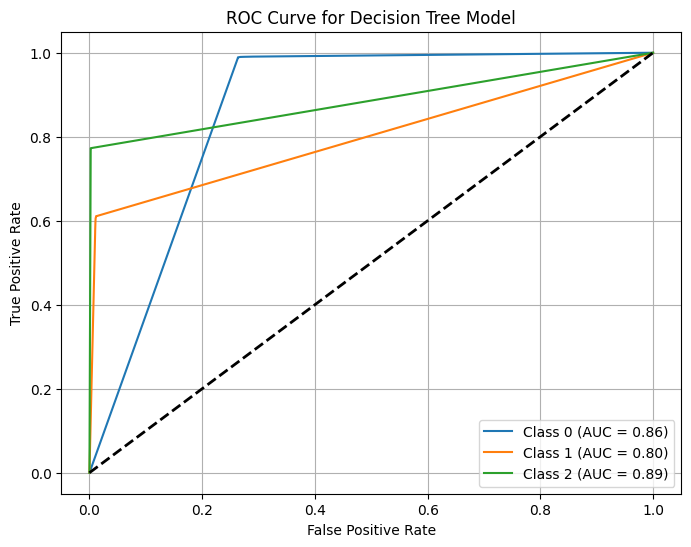

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

model = DecisionTreeClassifier(random_state=42)
model.fit(feature_train, target_train)

predictions_proba = model.predict_proba(feature_test)

from sklearn.preprocessing import label_binarize
target_binarized = label_binarize(target_test, classes=['Dusuk', 'Orta', 'Yuksek'])
n_classes = target_binarized.shape[1]

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(target_binarized[:, i], predictions_proba[:, i])
    roc_auc[i] = roc_auc_score(target_binarized[:, i], predictions_proba[:, i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Rastgele tahmin çizgisi
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decision Tree Model")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, cohen_kappa_score, precision_score, recall_score, f1_score

df = pd.read_excel('C:\\Users\\Dell\\Makineogrenimi\\cardataset\\cardataset.xlsx')

num_cols = ['price', 'hp', 'year', 'mileage']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

df['price_group'] = pd.cut(
    df['price'], bins=[0, 50000, 100000, float('inf')],
    labels=['Dusuk', 'Orta', 'Yuksek']
)

df = df[df['price_group'].notnull()]

features = df[['hp', 'year', 'mileage']]
target = df['price_group']

feature_train, feature_test, target_train, target_test = train_test_split(
    features, target, test_size=0.3, random_state=42
)

scaler = StandardScaler()
feature_train = scaler.fit_transform(feature_train)
feature_test = scaler.transform(feature_test)

model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
model.fit(feature_train, target_train)

predictions = model.predict(feature_test)

accuracy = accuracy_score(target_test, predictions)
precision = precision_score(target_test, predictions, average='weighted')
recall = recall_score(target_test, predictions, average='weighted')
f1 = f1_score(target_test, predictions, average='weighted')
kappa = cohen_kappa_score(target_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa:", kappa)
print("\nClassification Report:\n", classification_report(target_test, predictions))


Accuracy: 0.9804625772159172
Precision: 0.9775331388105616
Recall: 0.9804625772159172
F1 Score: 0.9782291105388508
Cohen's Kappa: 0.6298321295104259

Classification Report:
               precision    recall  f1-score   support

       Dusuk       0.99      1.00      0.99     13474
        Orta       0.69      0.45      0.54       360
      Yuksek       0.79      0.64      0.70        88

    accuracy                           0.98     13922
   macro avg       0.82      0.69      0.75     13922
weighted avg       0.98      0.98      0.98     13922



In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, cohen_kappa_score

df = pd.read_excel('C:\\Users\\Dell\\Makineogrenimi\\cardataset\\cardataset.xlsx')

num_cols = ['price', 'hp', 'year', 'mileage']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

df['price_group'] = pd.cut(
    df['price'], bins=[0, 50000, 100000, float('inf')],
    labels=['Dusuk', 'Orta', 'Yuksek']
)

df = df[df['price_group'].notnull()]

features = df[['hp', 'year', 'mileage',]]
target = df['price_group']

selector = SelectKBest(score_func=f_classif, k=2)
feature_selected = selector.fit_transform(features, target)

feature_train, feature_test, target_train, target_test = train_test_split(
    feature_selected, target, test_size=0.2, random_state=42
)



scaler = StandardScaler()
feature_train = scaler.fit_transform(feature_train)
feature_test = scaler.transform(feature_test)
feature_all_train = scaler.fit_transform(feature_all_train)
feature_all_test = scaler.transform(feature_all_test)

knn_model_selected = KNeighborsClassifier(n_neighbors=5)
knn_model_selected.fit(feature_train, target_train)
predictions_knn_selected = knn_model_selected.predict(feature_test)

knn_model_all = KNeighborsClassifier(n_neighbors=5)
knn_model_all.fit(feature_all_train, target_train)
predictions_knn_all = knn_model_all.predict(feature_all_test)

svm_model_selected = SVC(kernel='linear', C=1)
svm_model_selected.fit(feature_train, target_train)
predictions_svm_selected = svm_model_selected.predict(feature_test)

svm_model_all = SVC(kernel='linear', C=1)
svm_model_all.fit(feature_all_train, target_train)
predictions_svm_all = svm_model_all.predict(feature_all_test)

decision_tree_selected = DecisionTreeClassifier(random_state=42)
decision_tree_selected.fit(feature_train, target_train)
predictions_tree_selected = decision_tree_selected.predict(feature_test)

decision_tree_all = DecisionTreeClassifier(random_state=42)
decision_tree_all.fit(feature_all_train, target_train)
predictions_tree_all = decision_tree_all.predict(feature_all_test)

models = {
    'KNN Selected Features': predictions_knn_selected,
    'KNN All Features': predictions_knn_all,
    'SVM Selected Features': predictions_svm_selected,
    'SVM All Features': predictions_svm_all,
    'Decision Tree Selected Features': predictions_tree_selected,
    'Decision Tree All Features': predictions_tree_all,
}

results = {}
for model_name, predictions in models.items():
    accuracy = accuracy_score(target_test, predictions)
    precision = precision_score(target_test, predictions, average='weighted')
    recall = recall_score(target_test, predictions, average='weighted')
    f1 = f1_score(target_test, predictions, average='weighted')
    kappa = cohen_kappa_score(target_test, predictions)
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        "Cohen's Kappa": kappa
    }

for model_name, metrics in results.items():
    print(f"\n{model_name}:\n", metrics)



KNN Selected Features:
 {'Accuracy': 0.9799590561361923, 'Precision': 0.977962040124815, 'Recall': 0.9799590561361923, 'F1 Score': 0.9786374353997754, "Cohen's Kappa": 0.6364964499640553}

KNN All Features:
 {'Accuracy': 0.9802822971662536, 'Precision': 0.9788851228212792, 'Recall': 0.9802822971662536, 'F1 Score': 0.9794604907646212, "Cohen's Kappa": 0.6564048751652305}

SVM Selected Features:
 {'Accuracy': 0.9796358151061308, 'Precision': 0.9765145399430242, 'Recall': 0.9796358151061308, 'F1 Score': 0.9774511790034792, "Cohen's Kappa": 0.6112917386677752}

SVM All Features:
 {'Accuracy': 0.9812520202564379, 'Precision': 0.978567363998385, 'Recall': 0.9812520202564379, 'F1 Score': 0.9792253112447887, "Cohen's Kappa": 0.642211371911461}

Decision Tree Selected Features:
 {'Accuracy': 0.9827604783967245, 'Precision': 0.9812522721367735, 'Recall': 0.9827604783967245, 'F1 Score': 0.9817627129278998, "Cohen's Kappa": 0.6919306902141689}

Decision Tree All Features:
 {'Accuracy': 0.97694213